In [39]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [40]:
#Read dataset
train = pd.read_excel('Acviss interview - Training set.xlsx')
test = pd.read_excel('Acviss interview - Test set.xlsx')

In [41]:
train.head()

,product_MRP,product_ratings,seller_ratings
0,123,3.0,4.30
1,5999,4.4,2.65
2,4343,3.9,4.75
3,4499,3.8,4.75
4,150,4.1,4.65


In [42]:
test.head(6)

,product_MRP,product_ratings,seller_ratings,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,6299,3.6,4.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1199,4.5,4.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6009,4.1,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,133,1.6,4.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1685,4.2,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2299,1.0,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
test.dropna(axis=1,inplace=True)

In [50]:
#Check train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_MRP      116 non-null    int64  
 1   product_ratings  116 non-null    float64
 2   seller_ratings   116 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [51]:
#Check test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_MRP      6 non-null      int64  
 1   product_ratings  6 non-null      float64
 2   seller_ratings   6 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 272.0 bytes


In [52]:
# #Check presence of null values
# train.isna().any()
# #Drop Null rows
# train=train.dropna()
# train.info()

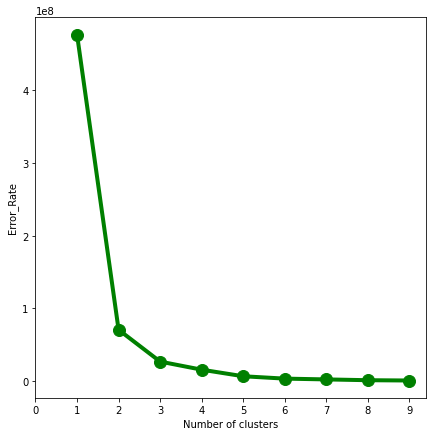

In [53]:
#Find num of clusters using Elbow method
Error_Rate = []
for i in range(1,10):
    model = KMeans(n_clusters = i)
    model.fit(train)
    Error_Rate.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,10),Error_Rate, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(10))
plt.xlabel("Number of clusters")
plt.ylabel("Error_Rate")
plt.show()

In [54]:
#Define model
model = KMeans(n_clusters = 5, max_iter = 300, n_init = 10, random_state = 0)

In [55]:
x = np.array(train['product_MRP'])
y = np.array(train['product_ratings'])
z = np.array(train['seller_ratings'])

In [56]:
def plot3d(isTrain=True):
    if isTrain:
        df=train
        y_clusters=model.fit_predict(df)
    else:
        df=test
        y_clusters=model.predict(df)
    #Change clusters into strings for distinct legend
#    y_clus=y_clusters
    y_clus=[]
    for x in y_clusters:
        y_clus.append(str(x))
    #Draw the graph
    fig = px.scatter_3d(df, 
                        x='product_MRP', 
                        y='product_ratings',
                        z='seller_ratings',
                        color=y_clus,
                        labels={
                            'product_MRP':'Product MRP ',
                            'product_ratings':'Product Ratings ',
                            'seller_ratings':'Seller Ratings ',
                            'color':'Cluster '
                        },
    #Change the legend order
                       category_orders={'color':['0','1','2','3','4']})
    #Change the fig size
    fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
    #Change the markers
    fig.update_traces(marker=dict(size=10,
                              line=dict(width=10,
                                        color='black')))
    fig.show()

In [57]:
plot3d(isTrain=True)

In [58]:
plot3d(isTrain=False)